In [1]:
__nbid__ = '0075'  # ID of this notebook in the DL NB collection. If contributing a new notebook, coordinate with DL team which ID to use 
__author__ = 'Andy Morgan <andy.morgan@noirlab.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>' # single string; emails in <>
__version__ = '20250904' # yyyymmdd; version datestamp of this notebook
__datasets__ = ['DESI DR1']  # datasets used in this notebook
__keywords__ = ['tutorial', 'HowTo', 'Python', 'Jupyter', 'quasars', 'sparcl'] # keywords relevant to this notebook, e.g. ['science case','dwarf galaxies'] Use only keywords from the master list: https://github.com/astro-datalab/notebooks-latest/blob/master/keywords.txt

# Using the DESI AGN/QSO Value-Added Catalog

*Andy Morgan, Stephanie Juneau, & the Astro Data Lab Team*

### Table of contents
* [Goals & notebook summary](#goals)
* [Disclaimer & attribution](#attribution)
* [Resources and references](#resources)
* [Imports & setup](#import)
* [Bitmasks](#bitmask)
* [Accessing the Catalog](#catalog)
* [Applying Bitmasks](#filter)
* [Plotting Distributions](#distribution)
* [Creating BPT Diagnostic Diagrams](#bpt)
* [Plotting Other Diagnostics](#diagnostics)
  * [He II BPT](#heii)
  * [WHAN Diagram](#whan)
  * [Blue Diagram](#blue)
  * [MEx Diagram](#mex)
  * [KEx Diagram](#kex)
  * [WISE Colors](#wise)

<a class="anchor" id="goals"></a>
# Goals
* Provide a step-by-step guide to access and use the DESI DR1 AGN/QSO VAC in Astro Data Lab.
* Demonstrate querying Astro Data Lab with queryClient and saving results as pandas DataFrames and Astropy Tables.
* Explain how AGN diagnostic types are encoded and selected using bitmasks.
* Show how to compute and visualize AGN diagnostics using numpy and matplotlib.

# Summary
This notebook is a hands-on tutorial for querying and analyzing data with the Astro Data Lab. It adapts the DESI example notebook linked below for use on Astro Data Lab and demonstrates how to access the DESI DR1 AGN/QSO Value-Added Catalog and perform common tasks such as querying the catalog, filtering your query, and making plots.

* Example notebook: [https://data.desi.lbl.gov/public/dr1/vac/dr1/agnqso/v1.0/tutorial/01_how_to_use_AGNQSO_catalog_dr1.html](https://data.desi.lbl.gov/public/dr1/vac/dr1/agnqso/v1.0/tutorial/01_how_to_use_AGNQSO_catalog_dr1.html)
  * Note: the Astro Data Lab version of the DESI DR1 AGN/QSO VAC uses lowercase column names as opposed to the DESI hosted database accessed in the tutorial above
  * Also: the above tutorial makes two tables, T and T2 with differing columns. Astro Data Lab has these combined, so we will only use "T" in this tutorial

* ADL's DESI DR1 AGN/QSO VAC: [https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.agnqso](https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.agnqso)

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

If you use the DESI DR1 AGN/QSO VAC and/or this example notebook:

* Please cite S. Juneau, et al. (in prep)
* Please also consult the [VAC Readme file](https://data.desi.lbl.gov/doc/releases/dr1/vac/agnqso/) for the citations that accompany the AGN diagnostic diagrams

<a class="anchor" id="resources"></a>
# Resources and references
Add some resources and "further reading" links relevant to this notebook.

Lomb, N.R. (1976) "Least-squares frequency analysis of unequally spaced data". Astrophysics and Space Science. 39 (2): 447–462: http://adsabs.harvard.edu/abs/1976Ap%26SS..39..447L

Scargle, J. D. (1982) "Studies in astronomical time series analysis. II - Statistical aspects of spectral analysis of unevenly spaced data". Astrophysical Journal. 263, 835: http://adsabs.harvard.edu/doi/10.1086/160554

Lomb-Scargle periodograms in `astropy`: http://docs.astropy.org/en/stable/stats/lombscargle.html

<a class="anchor" id="import"></a>
# Imports and setup

To run the notebook, make sure to also download the following accompanying files and make them accessible by this notebook:
  * [agnmask.yaml](https://data.desi.lbl.gov/public/dr1/vac/dr1/agnqso/v1.0/tutorial/agnmask.yaml); Place this in the same directory as this notebook.
    * If you wish to use this bitmasking functionality for other notebooks, this file needs to be accessible by them as well
  * [desiutil_bitmask](https://data.desi.lbl.gov/public/dr1/vac/dr1/agnqso/v1.0/tutorial/desiutil_bitmask.py)
    * This is best done via 'pip install desiutil' from the terminal's default working directory
    * We will import from it later via 'from desiutil.bitmask import BitMask'
   
Additionally, some users may want to save to myDB within the Astro Data Lab platform itself. This is not necessary for this notebook, as we will be querying anonymously, but anybody that does want to login can uncomment and run the cell below.

In [2]:
#from dl import authClient as ac
#from dl import storeClient as sc
#token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))
#ac.whoAmI()

In [3]:
# Numpy
import numpy as np

# Plotting and suppressing warnings
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
import sys

# Astropy libraries
from astropy.table import Table
from astropy.io import fits
import fitsio

# Data Lab helper function and querying
from dl.helpers.utils import convert
from dl import queryClient as qc
from getpass import getpass

# Settings for our matplotlib plots
settings = {
    'font.size':12,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.0,
    'xtick.direction':'in',
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.0,
    'ytick.direction':'in',
    'ytick.minor.visible':True,
    'ytick.right':True,
    'axes.labelsize':14
}

plt.rcParams.update(**settings)

<a class="anchor" id="bitmask"></a>
### Create a Function to Decode the Bitmasks

AGN diagnostic types are stored in ints, which can be broken up into sums of powers of 2: 1+2+8+...
Each of these powers of 2 corresponds to a different identified type by a different diagnostic.
A BPT identified AGN, for example, corresponds to 2^11 so any object that has 2^11 in its powers of 2 summation for the 'agn_maskbits' column is flagged as some sort of AGN by at least 1 BPT diagnostic.
The function below just holds that kind of information in memory as three separate bitmasks that we can later directly apply to a queried sample of galaxies.

In [4]:
def get_agn_maskbits(file):
    # Read and write yaml files
    import yaml
    # DESI's utility library, importing module for bit masking
    from desiutil.bitmask import BitMask # This is what we pip installed earlier. If this import throws an error, make sure you have actually installed the module. See the Imports and Setup section
    # Open and load the yaml file
    file_yaml = open(file, 'r')
    yaml_defs = yaml.safe_load(file_yaml)

    # Assign bit masks
    agn_maskbits = BitMask('AGN_MASKBITS', yaml_defs)
    opt_uv_type = BitMask('OPT_UV_TYPE', yaml_defs)
    ir_type = BitMask('IR_TYPE', yaml_defs)

    return agn_maskbits, opt_uv_type, ir_type

<a class="anchor" id="catalog"></a>
### Accessing the AGN/QSO Catalog

The public location of the Astro Data Lab DESI DR1 AGN/QSO VAC is [https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.agnqso](https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.agnqso)

In [5]:
# Astro Data Lab tables are queried using SQL queries saved as strings
# You first define your query; "SELECT ... FROM ... WHERE ..."
# Then, you call queryClient, qc, and tell it that the query is an SQL query
# Here we define an SQL query of the desi_dr1.agnqso table that selects 5000 rows of the table
query = "SELECT TOP 5000 * FROM desi_dr1.agnqso"
result = qc.query(sql=query)

In [6]:
# We can print the query and see that the return is a long string
print(result[:3000]) # Let's limit it to 3000 characters for now

z,zerr,target_ra,target_dec,min_mjd,mean_mjd,max_mjd,elon,elat,glon,glat,targetid,zwarn,ls_id,desi_target,scnd_target,bgs_target,cmx_target,sv1_desi_target,sv2_desi_target,sv3_desi_target,sv1_bgs_target,sv2_bgs_target,sv3_bgs_target,sv1_scnd_target,sv2_scnd_target,sv3_scnd_target,agn_maskbits,opt_uv_type,ir_type,healpix,coadd_fiberstatus,htm9,ring256,nest4096,random_id,coadd_exptime,logmstar,flux_w1,flux_w2,flux_w3,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,civ_1549_flux,civ_1549_flux_ivar,civ_1549_sigma,mgii_2796_flux,mgii_2796_flux_ivar,mgii_2796_sigma,mgii_2803_flux,mgii_2803_flux_ivar,mgii_2803_sigma,oii_3726_flux,oii_3726_flux_ivar,oii_3726_ew,oii_3726_ew_ivar,oii_3729_flux,oii_3729_flux_ivar,oii_3729_ew,oii_3729_ew_ivar,nev_3426_flux,nev_3426_flux_ivar,heii_4686_flux,heii_4686_flux_ivar,hbeta_flux,hbeta_flux_ivar,hbeta_ew,hbeta_ew_ivar,hbeta_broad_flux,hbeta_broad_flux_ivar,hbeta_broad_sigma,hbeta_broad_chi2,oiii_5007_flux,oiii_5007_flux_ivar,oiii_5007_sigma,oi_6300_flux,oi_6300_flux

In [7]:
# We would like to work with the values in this string, so we need to convert it into a table or an array of some sort.
# Let's use the convert function from the data lab helper function module and make a pandas dataframe.
df = convert(result, 'pandas')
df.head()

,z,zerr,target_ra,target_dec,min_mjd,mean_mjd,max_mjd,elon,elat,glon,...,sii_6716_flux_ivar,sii_6731_flux,sii_6731_flux_ivar,coadd_numexp,main_primary,sv_primary,zcat_primary,program,spectype,survey
0,2.003270,0.000835,266.987682,34.624442,59376.399144,59376.893144,59377.387144,265.317289,58.014783,59.918528,...,NaN,0.000000,NaN,2,t,f,t,dark,QSO,main
1,0.118703,0.000055,266.981389,34.647658,59385.333827,59385.339547,59385.345266,265.305787,58.037776,59.942166,...,0.135859,5.230048,0.158645,2,t,f,t,bright,GALAXY,main
2,0.319392,0.000028,267.020802,34.646032,59697.487344,59697.487344,59697.487344,265.367112,58.037426,59.950135,...,0.567882,4.050038,0.595152,1,t,f,t,bright,GALAXY,main
3,0.201896,0.000008,267.069687,34.646053,59697.487344,59697.487344,59697.487344,265.443027,58.039005,59.962242,...,1.034776,7.713470,1.023781,1,t,f,t,bright,GALAXY,main
4,2.262160,0.000296,267.027437,34.669579,59376.399144,59376.893144,59377.387144,265.375681,58.061168,59.977318,...,NaN,0.000000,NaN,2,t,f,t,dark,QSO,main


In [8]:
# However, we can also directly format the query result into a dataframe for convenience using the 'fmt' argument of the qc.query() function
# Acceptable formats are 'csv', numpy 'array', numpy 'structarray', pandas 'dataframe', astropy 'table', astropy 'votable', and 'ascii'
query = "SELECT TOP 5000 * FROM desi_dr1.agnqso"
df = qc.query(sql=query, fmt='pandas')
# Print the first few rows of the dataframe
df.head()

,z,zerr,target_ra,target_dec,min_mjd,mean_mjd,max_mjd,elon,elat,glon,...,sii_6716_flux_ivar,sii_6731_flux,sii_6731_flux_ivar,coadd_numexp,main_primary,sv_primary,zcat_primary,program,spectype,survey
0,0.139551,0.000059,269.454914,35.646998,59709.473210,59709.473210,59709.473210,269.137834,59.084663,61.631743,...,0.132432,2.936826,0.164609,1,t,f,t,bright,GALAXY,main
1,0.140780,0.000022,269.447313,35.651503,59716.441173,59716.441173,59716.441173,269.125746,59.089122,61.634641,...,0.143921,0.155654,0.197152,1,t,f,t,bright,GALAXY,main
2,0.275304,0.000068,269.536229,35.635895,59716.441173,59716.441173,59716.441173,269.266582,59.074011,61.640299,...,0.503959,0.000008,0.498636,1,t,f,t,bright,GALAXY,main
3,0.977080,0.000015,269.505946,35.650664,59729.441185,59729.441185,59729.441185,269.218501,59.088620,61.648437,...,NaN,0.000000,NaN,1,t,f,t,dark,GALAXY,main
4,0.473869,0.000023,269.545296,35.656385,59729.441185,59729.441185,59729.441185,269.280675,59.094546,61.664400,...,NaN,0.000000,NaN,1,t,f,t,dark,GALAXY,main


In [9]:
# For this tutorial, let's instead use Astropy tables
query = "SELECT TOP 5000 * FROM desi_dr1.agnqso"
T = qc.query(sql=query, fmt='table')
# Print the columns of the astropy table, see that they are the same as the pandas dataframes above
T.columns

<TableColumns names=('z','zerr','target_ra','target_dec','min_mjd','mean_mjd','max_mjd','elon','elat','glon','glat','targetid','zwarn','ls_id','desi_target','scnd_target','bgs_target','cmx_target','sv1_desi_target','sv2_desi_target','sv3_desi_target','sv1_bgs_target','sv2_bgs_target','sv3_bgs_target','sv1_scnd_target','sv2_scnd_target','sv3_scnd_target','agn_maskbits','opt_uv_type','ir_type','healpix','coadd_fiberstatus','htm9','ring256','nest4096','random_id','coadd_exptime','logmstar','flux_w1','flux_w2','flux_w3','flux_ivar_w1','flux_ivar_w2','flux_ivar_w3','civ_1549_flux','civ_1549_flux_ivar','civ_1549_sigma','mgii_2796_flux','mgii_2796_flux_ivar','mgii_2796_sigma','mgii_2803_flux','mgii_2803_flux_ivar','mgii_2803_sigma','oii_3726_flux','oii_3726_flux_ivar','oii_3726_ew','oii_3726_ew_ivar','oii_3729_flux','oii_3729_flux_ivar','oii_3729_ew','oii_3729_ew_ivar','nev_3426_flux','nev_3426_flux_ivar','heii_4686_flux','heii_4686_flux_ivar','hbeta_flux','hbeta_flux_ivar','hbeta_ew','hbeta_

<a class="anchor" id="filter"></a>
### Filtering AGN/QSO with Bitmasks

In [10]:
# First we must load the bitmasks using the decoding function we defined earlier and the agnmask.yaml file linked above in 'Import and Setup'
# Here I've place the .yaml file in the same directory as this notebook
agn_maskbits, opt_uv_type, ir_type = get_agn_maskbits('./agnmask.yaml')

The format of these bitmasks is:

\- \[name of target bit, bit value, description as a string\]

Example:

\- \[NII_SY,    8, "NII BPT Seyfert"\]

which means the target bit is NII_SY, its value is 2<sup>8</sup>, and its classified as a Seyfert according to the NII BPT diagnostic.

Here are the different bitmasks:

In [11]:
print(agn_maskbits)

AGN_MASKBITS:
  - [AGN_ANY,          0, "any AGN classification is set"]
  - [RR,               1, "RR determines this to be a QSO from template fitting"]
  - [MGII,             2, "MgII afterburner detects broad line"]
  - [QN,               3, "Quasar Net reclassifies as a QSO"]
  - [QN_NEW_RR,        4, "Quasar Net prompts different RR redshift"]
  - [QN_BGS,           5, "Quasar Net reclassifies BGS target as a QSO"]
  - [QN_ELG,           6, "Quasar Net reclassifies ELG target as a QSO"]
  - [QN_VAR_WISE,      7, "Quasar Net reclassifies VAR_WISE_QSO target as a QSO"]
  - [BPT_ANY_SY,      10, "At least one BPT diagnostic indicates SEYFERT (robust AGN)"]
  - [BPT_ANY_AGN,     11, "At least one BPT diagnostic indicates SEYFERT, LINER or COMPOSITE"]
  - [BROAD_LINE,      12, "Lines with FWHM >=1200 km/s in Halpha, Hbeta, MgII and/or CIV line"]
  - [OPT_OTHER_AGN,   13, "Rest frame optical emission lines diagnostic not BPT (4000-10000 ang) indicate AGN"]
  - [UV,              14, "Re

In [12]:
print(opt_uv_type)

OPT_UV_TYPE:
  - [NII_BPT,          0, "NII BPT diagnostic is available"]
  - [NII_SF,           1, "NII BPT Star-forming"]
  - [NII_COMP,         2, "NII BPT Composite"]
  - [NII_SY,           3, "NII BPT Seyfert"]
  - [NII_LINER,        4, "NII BPT LINER"]
  - [SII_BPT,          5, "SII BPT diagnostic is available"]
  - [SII_SF,           6, "SII BPT Star-forming"]
  - [SII_SY,           7, "SII BPT Seyfert"]
  - [SII_LINER,        8, "SII BPT LINER"]
  - [OI_BPT,           9, "OI BPT diagnostic is available"]
  - [OI_SF,           10, "OI BPT Star-forming"]
  - [OI_SY,           11, "OI BPT Seyfert"]
  - [OI_LINER,        12, "OI BPT LINER"]
  - [WHAN,            13, "WHAN is available (Halpha and [NII])"]
  - [WHAN_SF,         14, "WHAN Star-forming"]
  - [WHAN_SAGN,       15, "WHAN Strong AGN"]
  - [WHAN_WAGN,       16, "WHAN Weak AGN"]
  - [WHAN_RET,        17, "WHAN Retired"]
  - [WHAN_PASS,       18, "WHAN Passive"]
  - [BLUE,            19, "Blue diagram available"]
  - [BLUE_

In [13]:
print(ir_type)

IR_TYPE:
  - [WISE_W12,         0, "WISE W1 and W2 available (update_AGNTYPE_WISE_colors)"]
  - [WISE_W123,        1, "WISE W1, W2 and W3 available"]
  - [WISE_AGN_J11,     2, "WISE diagnostic Jarrett et al. 2011 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_J11,      3, "WISE diagnostic Jarrett et al. 2011 is not an AGN (based on W1,W2,W3)"]
  - [WISE_AGN_S12,     4, "WISE diagnostic Stern et al. 2012 is AGN (based on W1,W2)"]
  - [WISE_SF_S12,      5, "WISE diagnostic Stern et al. 2012 is not an AGN (based on W1,W2)"]
  - [WISE_AGN_M12,     6, "WISE diagnostic Mateos et al. 2012 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_M12,      7, "WISE diagnostic Mateos et al. 2012 is not an AGN (based on W1,W2,W3)"]
  - [WISE_AGN_A18,     8, "WISE diagnostic Assef et al. 2018 is AGN (based on W1,W2)"]
  - [WISE_SF_A18,      9, "WISE diagnostic Assef et al. 2018 is not an AGN (based on W1,W2)"]
  - [WISE_AGN_Y20,    10, "WISE diagnostic Yao et al. 2020 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_Y20,   

Now we want to apply these masks and filter out for specific types of AGN. We apply these masks via a bitwise AND between T\['bitmask'\] and bitmask.DIAGNOSTIC_AGN_TYPE:

T\[ (T\['bitmask'\] \& bitmask.DIAGNOSTIC_AGN_TYPE != 0) \]

This just checks that T\['bitmask'\] has 2$^{bitmask\_value}$ in its powers of 2 summation, and the object has been marked as bitmask.DIAGNOSTIC_AGN_TYPE.

Here are two examples of filtering for NII BPT star-forming galaxies and LINERS.

In [14]:
# Filters for entries of the table that have the target bit for NII_SF active
is_nii_sf = (T['opt_uv_type'] & opt_uv_type.NII_SF != 0)
# In the initial writing of this tutorial, 342 of the queried 5000 objects were marked as NII_SF
len(T[is_nii_sf])

329

In [15]:
is_nii_liner = (T['opt_uv_type'] & opt_uv_type.NII_LINER != 0)
# we can also move these filtered objects to a new table
T2 = T[is_nii_liner]
T2

z,zerr,target_ra,target_dec,min_mjd,mean_mjd,max_mjd,elon,elat,glon,glat,targetid,zwarn,ls_id,desi_target,scnd_target,bgs_target,cmx_target,sv1_desi_target,sv2_desi_target,sv3_desi_target,sv1_bgs_target,sv2_bgs_target,sv3_bgs_target,sv1_scnd_target,sv2_scnd_target,sv3_scnd_target,agn_maskbits,opt_uv_type,ir_type,healpix,coadd_fiberstatus,htm9,ring256,nest4096,random_id,coadd_exptime,logmstar,flux_w1,flux_w2,flux_w3,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,civ_1549_flux,civ_1549_flux_ivar,civ_1549_sigma,mgii_2796_flux,mgii_2796_flux_ivar,mgii_2796_sigma,mgii_2803_flux,mgii_2803_flux_ivar,mgii_2803_sigma,oii_3726_flux,oii_3726_flux_ivar,oii_3726_ew,oii_3726_ew_ivar,oii_3729_flux,oii_3729_flux_ivar,oii_3729_ew,oii_3729_ew_ivar,nev_3426_flux,nev_3426_flux_ivar,heii_4686_flux,heii_4686_flux_ivar,hbeta_flux,hbeta_flux_ivar,hbeta_ew,hbeta_ew_ivar,hbeta_broad_flux,hbeta_broad_flux_ivar,hbeta_broad_sigma,hbeta_broad_chi2,oiii_5007_flux,oiii_5007_flux_ivar,oiii_5007_sigma,oi_6300_flux,oi_6300_flux_ivar,halpha_flux,halpha_flux_ivar,halpha_ew,halpha_ew_ivar,halpha_broad_flux,halpha_broad_flux_ivar,halpha_broad_sigma,halpha_broad_vshift,nii_6584_flux,nii_6584_flux_ivar,sii_6716_flux,sii_6716_flux_ivar,sii_6731_flux,sii_6731_flux_ivar,coadd_numexp,main_primary,sv_primary,zcat_primary,program,spectype,survey
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str1,str1,str1,str6,str6,str4
0.4643260021000902,4.92035973925438e-05,269.8269971145468,36.75659498031036,59708.47219975,59708.47219975,59708.47219975,269.721140318493,60.19572415010622,62.90722677477753,25.70021417174456,39633016393304611,0,9907733954169379,1152921504606846976,0,257,0,0,0,0,0,0,0,0,0,0,10241,348529930769,10923,32752,0,3426691,157951,134155836,97.832664,273.4353,10.967062,52.36715,41.29927,108.20876,3.187398,1.1081432,0.0017175863,0.0,nan,0.0,0.0,nan,2157.989,0.0,nan,2157.989,9.316434,0.058141194,6.9559693,0.07672445,5.782266,0.054386053,5.008694,0.06399048,0.2712032,0.059555385,2.2014065,0.24838611,6.014483,0.3047382,2.4736495,1.7296113,0.0,nan,0.0,0.0,11.387392,0.18684539,158.87236,4.17997,0.3096059,25.831524,0.1533781,9.028362,1.0825851,0.0,nan,0.0,0.0,32.14775,0.14117697,0.0,nan,0.0,nan,1,t,f,t,bright,GALAXY,main
0.4528733030651335,4.738103740309171e-05,244.1561120148599,34.55326594436681,59350.38691099,59350.38691099,59350.38691099,231.6908869463297,54.60848023250247,55.71458430596165,45.8035448136784,39632971786879360,0,9907733257191808,1152921504606847233,0,257,0,0,0,0,0,0,0,0,0,0,10241,1716040497,545,9442,0,3649460,170166,38677820,86.3548,838.3204,10.989458,60.102173,37.81341,46.07426,2.7378623,0.9711073,0.0024529714,0.0,nan,0.0,0.002283331,0.016746812,1991.7277,0.1330254,0.016967768,1991.7277,4.8221936,0.30049044,3.8911383,0.45263675,11.325714,0.29698595,9.000255,0.42081743,0.0,nan,0.0,nan,3.9949086,0.6648188,1.5679098,4.2973237,0.0,nan,0.0,0.0,8.117239,0.37255597,228.95341,5.1538267,0.6364573,30.67729,0.2959182,10.611687,2.3079977,0.0,nan,0.0,0.0,29.838228,0.22865555,14.940327,0.4083698,12.305615,0.39687756,1,t,f,t,dark,GALAXY,main
0.3873859613530601,0.0001077825446940604,244.0452323761281,34.6817307010666,59350.38691099,59350.38691099,59350.38691099,231.4737313383982,54.70360714616786,55.88732722272683,45.90530239176891,39632976761327809,0,9907733334921409,1152921504606847233,0,257,0,0,0,0,0,0,0,0,0,0,10241,4937363985,545,9442,0,36

<a class="anchor" id="distribution"></a>
### How to Plot Distributions

Let's plot the redshift distributions of different AGN types

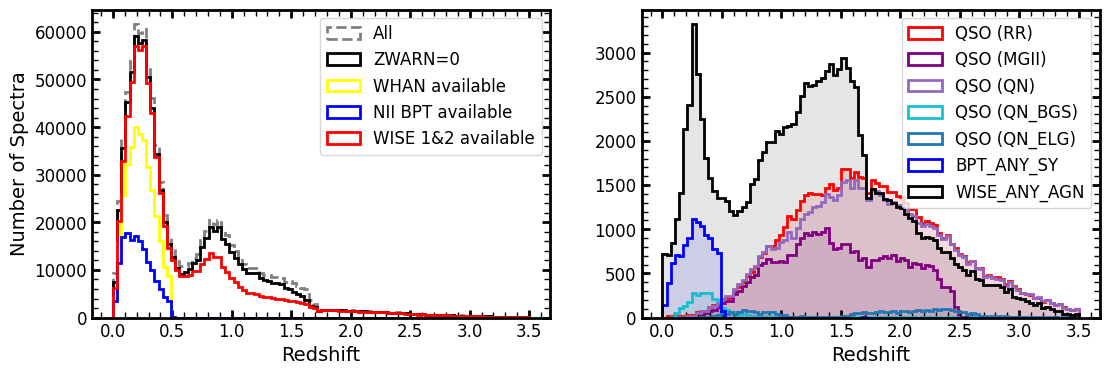

In [16]:
# Before plotting, let's update our query to include many more objects, say 1,000,000
query = "SELECT TOP 1000000 * FROM desi_dr1.agnqso"
T = qc.query(sql=query, fmt='table')

# Labels for the plot legend
agnlabels = ['QSO (RR)', 'QSO (MGII)', 'QSO (QN)', 'QSO (QN_BGS)', 'QSO (QN_ELG)', 'BPT_ANY_SY', 'WISE_ANY_AGN']

# Names of the AGN types in the agn_maskbits bitmask
agntypes = ['RR', 'MGII', 'QN', 'QN_BGS', 'QN_ELG', 'BPT_ANY_SY', 'WISE_ANY_AGN']

# Colors for the plot
colors = ['red', 'purple', 'tab:purple', 'tab:cyan', 'tab:blue', 'blue', 'black']

# Initialize our figure for 2 side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4), sharex=True)

# Define our redshift range 0 < z < 3.5
rangeZ = (0, 3.5)

# Left-hand panel; full catalog + only secure redshifts
# For more information on what these parameters mean and their options: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
ax1.hist(T['z'], bins=100, range=(rangeZ), histtype='step', lw=2, color='gray', ls='--', label='All')
ax1.hist(T['z'][T['zwarn']==0], bins=100, range=(rangeZ), histtype='step', lw=2, color='k', label='ZWARN=0')

# WHAN available
ax1.hist(T['z'][(T['zwarn']==0)&(T['opt_uv_type'] & opt_uv_type.WHAN != 0)], bins=100,
         range=(rangeZ), histtype='step', lw=2, color='yellow', label='WHAN available')

# NII BPT available
ax1.hist(T['z'][(T['zwarn']==0)&(T['opt_uv_type'] & opt_uv_type.NII_BPT != 0)], bins=100,
         range=(rangeZ), histtype='step', lw=2, color='blue', label='NII BPT available')

# WISE 1&2 available
ax1.hist(T['z'][(T['zwarn']==0)&(T['ir_type'] & ir_type.WISE_W12 != 0)], bins=100,
         range=(rangeZ), histtype='step', lw=2, color='red', label='WISE 1&2 available')

# Right-hand panel; Show distributions by AGN type
for i, agn in enumerate(agntypes):
    typeFilter = (T['agn_maskbits'] & agn_maskbits[agn] != 0)
    typeColor = colors[i]
    typeLabel = agnlabels[i]
    # We're going to break up the declaration of this right side histogram
    # The first line makes a solid, transparent histogram
    ax2.hist(T['z'][typeFilter], bins=100, range=(rangeZ), alpha=0.1, color=typeColor)
    # This second line makes a new line histogram for the same data
    ax2.hist(T['z'][typeFilter], bins=100, range=(rangeZ), histtype='step', lw=2, color=typeColor, label=typeLabel)
    # Together, they create the 'painted glass' look on the right hand side of the plot


# Axis Labels
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Number of Spectra')
ax2.set_xlabel('Redshift')

# Legends
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.show()
         

<a class="anchor" id="bpt"></a>
### BPT Diagnostic Diagrams

We're going to cover how to create [BPT](https://ui.adsabs.harvard.edu/abs/1981PASP...93....5B/abstract) plots, a collection of plots that use log(\[OIII\]$_{5007}$/H$\beta$) as their y-axis and:
* ($\textbf{a}$) log(\[NII\]$_{6584}$/H$\alpha$)
* ($\textbf{b}$) log(\[SII\]$_{6717, 6731}$/H$\alpha$)
* ($\textbf{c}$) log(\[OI\]$_{6300}$/H$\alpha$)
  
as their x-axes.

The \[NII\] BPT has regions defined by:
* Star-forming vs AGN, [Kewley et al. (2001)](https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract)
* Star-forming vs Composite, [Kauffmann et al. (2003)](https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract)
* Seyfert vs LINER, [Schawinsky et al. (2007)](https://ui.adsabs.harvard.edu/abs/2007MNRAS.382.1415S/abstract)

The \[SII\] BPT has regions defined by:
* Star-forming vs AGN, [Law et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...915...35L/abstract)
* Seyfert vs LINER, [Kewley et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006MNRAS.372..961K/abstract)
* Credit to [Veilleux & Osterbrock (1987)](https://ui.adsabs.harvard.edu/abs/1987ApJS...63..295V/abstract)

The \[OI\] BPT has regions defined by:
* Star-forming vs AGN, [Law et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...915...35L/abstract)
* Seyfert vs LINER, [Kewley et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006MNRAS.372..961K/abstract)
* Credit to [Veilleux & Osterbrock (1987)](https://ui.adsabs.harvard.edu/abs/1987ApJS...63..295V/abstract)

To plot these BPT diagrams we'll need to calculate the logs of these line ratios for our queried sample

In [17]:
# Calculate the logs of the ratios using numpy's vectorized math, the results are single column astropy tables
x_bptnii = np.log10(T['nii_6584_flux']/T['halpha_flux'])
x_bptsii = np.log10((T['sii_6716_flux']+T['sii_6731_flux'])/(T['halpha_flux']))
x_bptoi = np.log10(T['oi_6300_flux']/T['halpha_flux'])
y_bpt = np.log10(T['oiii_5007_flux']/T['hbeta_flux'])

Now that we have our log ratios, we need to filter them by BPT type. If you need to review how to apply these filters, refer back to [Applying Bitmasks](#filter)

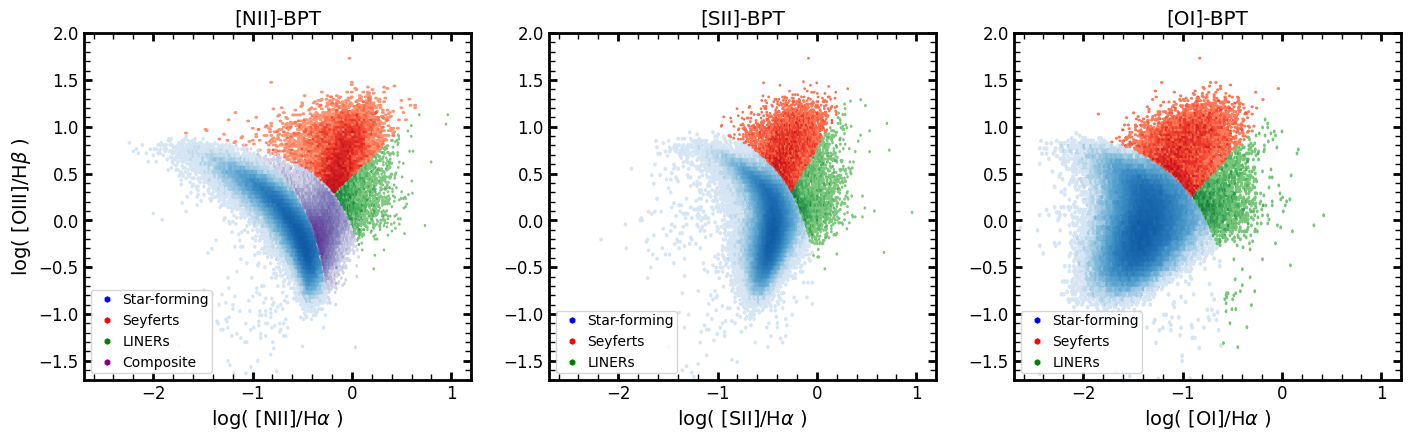

In [18]:
# We are going to make filters to apply to our above log ratio tables for plotting on the three BPT diagrams
# We will be using matplotlib hexbins, for more information on them: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
# NII star-forming
is_nii_sf = (T['opt_uv_type'] & opt_uv_type.NII_SF != 0)
# NII Seyfert
is_nii_sy = (T['opt_uv_type'] & opt_uv_type.NII_SY != 0)
# NII LINER
is_nii_lin = (T['opt_uv_type'] & opt_uv_type.NII_LINER != 0)
# NII Composite
is_nii_comp = (T['opt_uv_type'] & opt_uv_type.NII_COMP != 0)

# SII BPT type filters
# SII star-forming
is_sii_sf = (T['opt_uv_type'] & opt_uv_type.SII_SF !=0)
# SII Seyfert
is_sii_sy = (T['opt_uv_type'] & opt_uv_type.SII_SY != 0)
# SII LINER
is_sii_lin = (T['opt_uv_type'] & opt_uv_type.SII_LINER != 0)

# OI BPT type filters
# OI star-forming
is_oi_sf = (T['opt_uv_type'] & opt_uv_type.OI_SF != 0)
# OI Syfert
is_oi_sy = (T['opt_uv_type'] & opt_uv_type.OI_SY != 0)
# OI LINER
is_oi_lin = (T['opt_uv_type'] & opt_uv_type.OI_LINER != 0)

# Set some plot parameters
norm_min, norm_max = 0.3, 300

# Initialize the figure
plt.figure(figsize=(17, 4.5))

# NII BPT Diagram
plt.subplot2grid((1,3), (0, 0)) # left-most plot
plt.title('[NII]-BPT')
plt.hexbin(x_bptnii[is_nii_sf], y_bpt[is_nii_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # NII Star-forming galaxies
plt.hexbin(x_bptnii[is_nii_sy], y_bpt[is_nii_sy], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # NII Seyferts
plt.hexbin(x_bptnii[is_nii_lin], y_bpt[is_nii_lin], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Greens') # NII LINERS
plt.hexbin(x_bptnii[is_nii_comp], y_bpt[is_nii_comp], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Purples') # NII Composites
plt.xlabel('log( [NII]/H$\\alpha$ )')
plt.ylabel('log( [OIII]/H$\\beta$ )')
plt.xlim(-2.7, 1.2)
plt.ylim(-1.7, 2)
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='b', markersize=6, label='Star-forming'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='r', markersize=6, label='Seyferts'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='g', markersize=6, label='LINERs'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='purple', markersize=6, label='Composite')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=10, framealpha=0.8, handletextpad=0.1, borderpad=0.2)

# SII BPT Diagram
plt.subplot2grid((1,3), (0, 1)) # middle plot
plt.title('[SII]-BPT')
plt.hexbin(x_bptsii[is_sii_sf], y_bpt[is_sii_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # SII Star-forming galaxies
plt.hexbin(x_bptsii[is_sii_sy], y_bpt[is_sii_sy], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # SII Seyferts
plt.hexbin(x_bptsii[is_sii_lin], y_bpt[is_sii_lin], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Greens') # SII LINERS
plt.xlabel('log( [SII]/H$\\alpha$ )')
plt.xlim(-2.7, 1.2)
plt.ylim(-1.7, 2)
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='b', markersize=6, label='Star-forming'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='r', markersize=6, label='Seyferts'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='g', markersize=6, label='LINERs')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=10, framealpha=0.8, handletextpad=0.1, borderpad=0.2)

# OI BPT Diagram
plt.subplot2grid((1,3), (0, 2)) # right-most plot
plt.title('[OI]-BPT')
plt.hexbin(x_bptoi[is_oi_sf], y_bpt[is_oi_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # OI Star-forming galaxies
plt.hexbin(x_bptoi[is_oi_sy], y_bpt[is_oi_sy], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # OI Seyferts
plt.hexbin(x_bptoi[is_oi_lin], y_bpt[is_oi_lin], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Greens') # OI LINERS
plt.xlabel('log( [OI]/H$\\alpha$ )')
plt.xlim(-2.7, 1.2)
plt.ylim(-1.7, 2)
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='b', markersize=6, label='Star-forming'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='r', markersize=6, label='Seyferts'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='g', markersize=6, label='LINERs')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=10, framealpha=0.8, handletextpad=0.1, borderpad=0.2)

plt.show()

Those look pretty good! But we still have some diagnostics we can plot!

<a class="anchor" id="diagnostics"></a>
### The Other Diagnostics

We still have:
* He II BPT
* WHAN diagram
* Blue diagram
* MEx diagram
* KEx diagram
* WISE colors

Let's make them in order below!

<a class="anchor" id="heii"></a>
#### 1) The He II BPT

This diagnostic comes from [Shirazi & Brinchmann, (2021)](https://ui.adsabs.harvard.edu/abs/2012MNRAS.421.1043S/abstract) and plots log(\[HEII\]$_{4686}$/$\textbf{H}\beta$) against log(\[NII\]$_{6584}$/$\textbf{H}\alpha$) and was found by pairwise comparison of locations in the traditional NII BPT diagram and this newer He II BPT diagram.

In [19]:
# Calculate the log ratios
x_bptnii = np.log10(T['nii_6584_flux']/T['halpha_flux'])
y_bptheii = np.log10(T['heii_4686_flux']/T['hbeta_flux'])

# Create our filters
is_heii_sf = (T['opt_uv_type'] & opt_uv_type.HEII_SF != 0)
is_heii_agn = (T['opt_uv_type'] & opt_uv_type.HEII_AGN != 0)

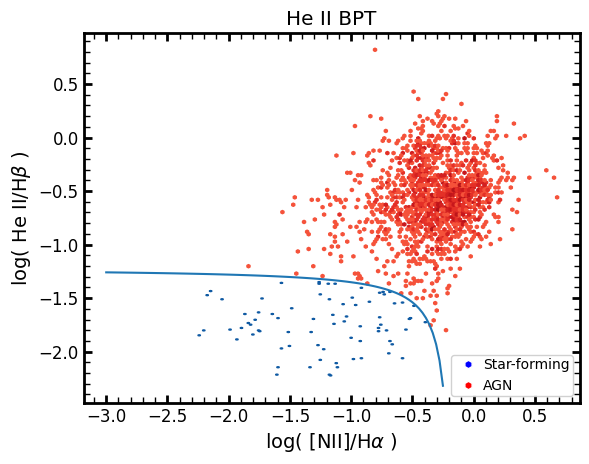

In [20]:
# Now we create our hexbin plot, this time with a line demarking the barrier decided on by Shirazi & Brinchmann

x_heii_line = np.linspace(-3, -0.25, 100)
y_heii_line = -1.22+(1/(8.92*x_heii_line+1.32))

norm_min, norm_max = 0.3, 300
color = cm.PuRd(0.5)

plt.title('He II BPT')
plt.hexbin(x_bptnii[is_heii_sf], y_bptheii[is_heii_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # HeII Star-forming
plt.hexbin(x_bptnii[is_heii_agn], y_bptheii[is_heii_agn], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # HeII AGN
plt.plot(x_heii_line, y_heii_line) # Demarcation from Shirazi & Brinchmann (2012)

plt.xlabel('log( [NII]/H$\\alpha$ )')
plt.ylabel('log( He II/H$\\beta$ )')
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='b', markersize=6, label='Star-forming'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='r', markersize=6, label='AGN')
]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, framealpha=0.9, handletextpad=0.1, borderpad=0.2)
plt.show()

The plot above looks pretty sparse for our measly 1,000,000 galaxy initial sample

<a class="anchor" id="whan"></a>
#### 2) WHAN: W$_{H\alpha}$ against log(\[NII\]/H$\alpha$)

WHAN diagrams were developed by [Cid Fernandez et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011MNRAS.413.1687C/abstract) and delineates between 5 primary sources of ionization within a galaxy:
* Pure star-forming : W$_{H\alpha}$ > 3 Å and log(\[NII\]/H$\alpha$) < -0.4
* Strong AGN : W$_{H\alpha}$ > 6 Å and log(\[NII\]/H$\alpha$) > -0.4
* Weak AGN : 3 Å < W$_{H\alpha}$ < 6 Å and log(\[NII\]/H$\alpha$) > -0.4
* Retired galaxies : W$_{H\alpha}$ < 3 Å
* Passive/Lineless galaxies : W$_{H\alpha}$ < 0.5 Å and W\[NII\] < 0.5 Å

In [21]:
# Create a filter that selects for WHAN availability
is_whan = (T['opt_uv_type'] & opt_uv_type.WHAN != 0)

# Create a sub-catalog of T by applying this filter
T_WHAN = T[is_whan]

# Calculate line ratio and get W$_{H\alpha}$
x_whan = np.log10(T_WHAN['nii_6584_flux']/T_WHAN['halpha_flux'])
y_whan = T_WHAN['halpha_ew']

# Filters for our different WHAN types
is_whan_sf = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_SF != 0) # Star-forming
is_whan_sagn = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_SAGN != 0) # Strong AGN
is_whan_wagn = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_WAGN != 0) # Weak AGN
is_whan_ret = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_RET != 0) # Retired
is_whan_pass = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_PASS != 0) # Passive

# For passive galaxies specifically, we're going to filter out negative H\alpha widths
x_passive = x_whan[is_whan_pass]
y_passive = y_whan[is_whan_pass]
passive_mask = y_passive > 0
x_passive = x_passive[passive_mask]
y_passive = y_passive[passive_mask]

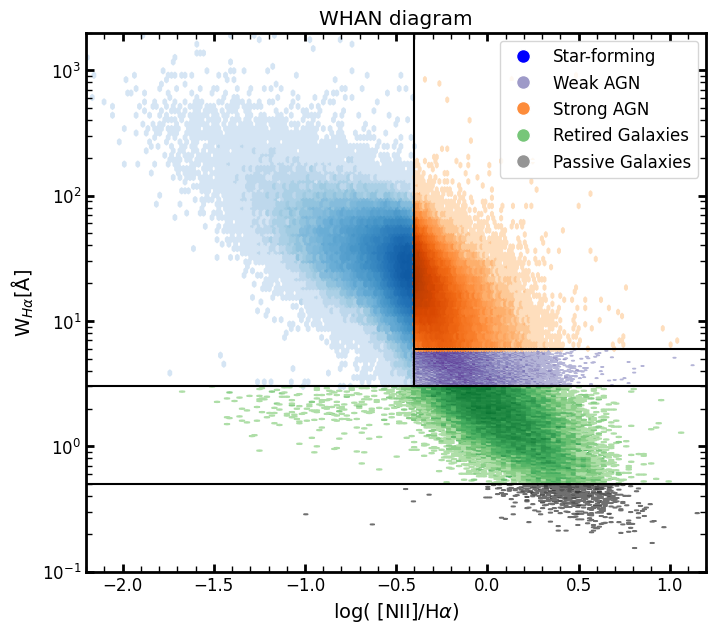

In [22]:
# Initialize figure properties for plotting
plt.figure(figsize=(8, 7))
plt.title('WHAN diagram')
norm_min, norm_mask = 0.3, 300

# Plot each WHAN type
plt.hexbin(x_whan[is_whan_sf], y_whan[is_whan_sf], bins=100, norm=LogNorm(norm_min, norm_mask), yscale='log', cmap='Blues') # Star-forming
plt.hexbin(x_whan[is_whan_wagn], y_whan[is_whan_wagn], bins=100, norm=LogNorm(norm_min, norm_mask), yscale='log', cmap='Purples') # Weak AGN
plt.hexbin(x_whan[is_whan_sagn], y_whan[is_whan_sagn], bins=100, norm=LogNorm(norm_min, norm_mask), yscale='log', cmap='Oranges') # Strong AGN
plt.hexbin(x_whan[is_whan_ret], y_whan[is_whan_ret], bins=100, norm=LogNorm(norm_min, norm_mask), yscale='log', cmap='Greens') # Retired
plt.hexbin(x_passive, y_passive, bins = 100, norm=LogNorm(norm_min, norm_max), yscale='log', cmap='Grays') # Passive

# Plot demarcation lines
plt.plot([-0.4, -0.4], [3, 2e3], color='black') # Star-forming cutoff
plt.plot([-0.4, 1.2], [6, 6], color='black') # Strong AGN cutoff
plt.axhline(y=3, color='black') # Retired cutoff
plt.axhline(y=0.5, color='black') # Passive cutoff

# Axes and labels
plt.xlabel('log( [NII]/H$\\alpha$)')
plt.ylabel('W$_{H\\alpha}$[Å]')

plt.xlim(-2.2, 1.2)
plt.ylim(0.1, 2e3)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Star-forming', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Weak AGN', markerfacecolor=cm.Purples(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Strong AGN', markerfacecolor=cm.Oranges(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Retired Galaxies', markerfacecolor=cm.YlGn(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Passive Galaxies', markerfacecolor=cm.Greys(0.5), markersize=10),
]

plt.legend(handles=legend_elements, loc='best')
plt.show()

<a class="anchor" id="blue"></a>

<a class="anchor" id="blue"></a>
#### 3) Blue Diagrams

Blue diagrams were developed by Lamareille et al. ([2004](https://academic.oup.com/mnras/article/350/2/396/1112879), [2010](https://www.aanda.org/articles/aa/pdf/2010/01/aa13168-09.pdf)) to classify emission line galaxies using the \[OII\]$_{3726, 3729}$, \[OIII\]$_{5007}$, and H$\beta$ lines.

Blue diagrams classify galaxies into Star-forming, Seyfert 2, LINERs, and composites, with the composites being Star-forming/LINER composites or Star-forming/AGN composites

In [23]:
# Create our BLUE available sub-catalog and filters
is_blue = (T['opt_uv_type'] & opt_uv_type.BLUE != 0)
T_BLUE = T[is_blue]
is_blue_sf = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_SF != 0) # Star-forming
is_blue_agn = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_AGN != 0) # AGN
is_blue_lin = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_LINER != 0) # LINER
is_blue_slc = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_SLC != 0) # Star-forming/LINER
is_blue_sfagn = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_SFAGN != 0) # Star-forming/AGN

In [24]:
# Calculate line ratios
x_blue = np.log10((T_BLUE['oii_3726_ew'] + T_BLUE['oii_3729_ew'])/T_BLUE['hbeta_ew'])
y_blue = np.log10(T_BLUE['oiii_5007_flux']/T_BLUE['hbeta_flux'])

# Demarcation lines
x_blue_mainline = np.linspace(-2, 0.9, 200)
x_blue_slc = np.linspace(0.09, 1.06)
y_blue_mainline = 0.11/(x_blue_mainline-0.92) + 0.85
y_blue_slc_a = -(x_blue_slc - 1)**2 - 0.1*x_blue_slc + 0.25
y_blue_slc_b = (x_blue_slc -0.2)**2 - 0.6

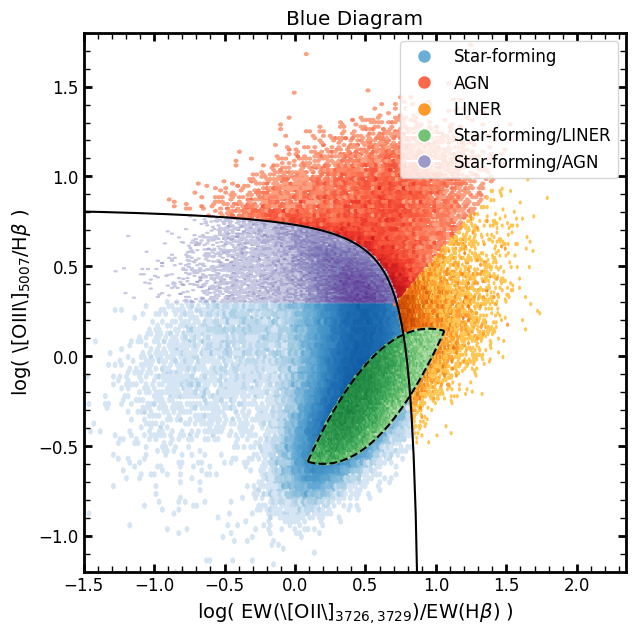

In [25]:
# Initialize figure
norm_min, norm_max = 0.3, 300
plt.figure(figsize=(7, 7))
plt.title('Blue Diagram')

plt.hexbin(x_blue[is_blue_sf], y_blue[is_blue_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # Star-forming
plt.hexbin(x_blue[is_blue_agn], y_blue[is_blue_agn], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # AGN
plt.hexbin(x_blue[is_blue_lin], y_blue[is_blue_lin], bins=100, norm=LogNorm(norm_min, norm_max), cmap='YlOrBr') # LINER
plt.hexbin(x_blue[is_blue_slc], y_blue[is_blue_slc], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Greens') # Star-forming/LINER
plt.hexbin(x_blue[is_blue_sfagn], y_blue[is_blue_sfagn], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Purples') # Star-forming/AGN

plt.plot(x_blue_mainline, y_blue_mainline, color='black')
plt.plot(x_blue_slc, y_blue_slc_a, color='black', ls='--')
plt.plot(x_blue_slc, y_blue_slc_b, color='black', ls='--')

plt.xlim(-1.5, 2.35)
plt.ylim(-1.2, 1.8)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Star-forming', markerfacecolor=cm.Blues(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='AGN', markerfacecolor=cm.Reds(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='LINER', markerfacecolor=cm.YlOrBr(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Star-forming/LINER', markerfacecolor=cm.Greens(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Star-forming/AGN', markerfacecolor=cm.Purples(0.5), markersize=10)
]
plt.legend(handles=legend_elements, loc='best')
plt.xlabel('log( EW(\[OII\]$_{3726, 3729}$)/EW(H$\\beta$) )')
plt.ylabel('log( \[OIII\]$_{5007}$/H$\\beta$ )')
plt.show()

<a class="anchor" id="mex"></a>
#### 4) MEx : Mass Excitation Diagnostic Diagram

The Mass Excitation Diagnostic is an empirical diagnostic from Juneau et al. ([2011](https://ui.adsabs.harvard.edu/abs/2011ApJ...736..104J/abstract), [2014](https://ui.adsabs.harvard.edu/abs/2014ApJ...788...88J/abstract)) that classifies galaxies as star-forming, AGN, or Intermediate/Composite based on their stellar mass (log(M$_{*}$/M$_{☉}$)) and emission line ratios (log(\[OIII\]/H$\beta$)). This diagnostic is particularly useful for high redshift galaxies where H$\alpha$ and \[NII\] may not be within the standard optical observing range.

In [26]:
# Get the stellar mass from the queried sample
mex_log_mass = T['logmstar']

# Calculate the line ratio
mex_oiii_hbeta = np.log10(T['oiii_5007_flux']/T['hbeta_flux'])

# Create filters
is_mex_sf = (T['opt_uv_type'] & opt_uv_type.MEX_SF != 0)
is_mex_agn = (T['opt_uv_type'] & opt_uv_type.MEX_AGN != 0)
is_mex_interm = (T['opt_uv_type'] & opt_uv_type.MEX_INTERM != 0)

# Define the 2014 demarcation lines
# AGN vs Composite cutoff
def mex_upper_2014(x):
    a0, a1, a2, a3 = 410.24, -109.333, 9.71731, -0.288244
    return np.where(x <= 10, 0.375/(x - 10.5) + 1.14, a0 + a1*x + a2*x**2 + a3*x**3)

# Composite vs Star-forming cutoff
def mex_lower_2014(x):
    a0, a1, a2, a3 = 352.066, -93.8249, 8.32651, -0.246416
    return np.where(x <= 9.6, 0.375/(x - 10.5) + 1.14, a0 + a1*x + a2*x**2 + a3*x**3)

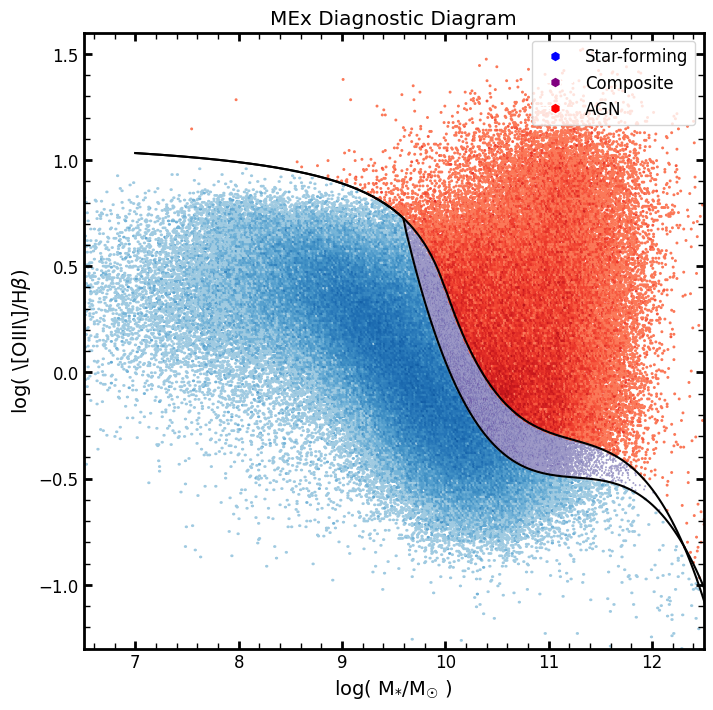

In [27]:
# Define a mass range to go into the demarcs above
mass_range = np.linspace(7, 13, 200)

# Initialize the figure
norm_min, norm_max = 0.3, 300
plt.figure(figsize=(8, 8))
plt.title('MEx Diagnostic Diagram')
gridsize = 500 # Make the markers smaller

plt.hexbin(mex_log_mass[is_mex_sf], mex_oiii_hbeta[is_mex_sf], bins=100, gridsize=gridsize, norm=LogNorm(norm_min, norm_max), cmap="Blues") # Star-forming
plt.hexbin(mex_log_mass[is_mex_interm], mex_oiii_hbeta[is_mex_interm], bins=100, gridsize=gridsize, norm=LogNorm(norm_min, norm_max), cmap="Purples") # Composite
plt.hexbin(mex_log_mass[is_mex_agn], mex_oiii_hbeta[is_mex_agn], bins=100, gridsize=gridsize, norm=LogNorm(norm_min, norm_max), cmap="Reds") # AGN

# Plot the demarcations
plt.plot(mass_range, mex_upper_2014(mass_range), color='black')
plt.plot(mass_range, mex_lower_2014(mass_range), color='black')

# Plot legend
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='blue', markersize=8, label='Star-forming'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='purple', markersize=8, label='Composite'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='red', markersize=8, label='AGN')
]
plt.legend(handles=legend_elements, loc='best')

# Set X and Y limits
plt.xlim(6.5, 12.5)
plt.ylim(-1.3, 1.6)

# Set labels
plt.xlabel('log( M$_{*}$/M$_{☉}$ )')
plt.ylabel('log( \[OIII\]/H$\\beta$)')

plt.show()

<a class="anchor" id="kex"></a>
#### 5) KEx : Kinematic Excitation Diagnostic Diagram

The KEx diagram, developed by Zhang & Hao ([2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...856..171Z/abstract)), classifies galaxies as star-forming, AGN, or Composite/Intermediate based on their velocity dispersion (log($\sigma_{[OIII]}$)) and emission line ratios (log(\[OIII\]/H$\beta$)). KEx's use of kinematic information makes it value for identifying AGN when stellar mass diagnostics are uncertain.

In [28]:
# Set our filters
is_kex_sf = (T['opt_uv_type'] & opt_uv_type.KEX_SF != 0)
is_kex_interm = (T['opt_uv_type'] & opt_uv_type.KEX_INTERM != 0)
is_kex_agn = (T['opt_uv_type'] & opt_uv_type.KEX_AGN != 0)

# Define our demarcs
# AGN vs Star-forming cutoff
def kex_upper(sigma_log):
    return -2*sigma_log + 4.2

# Star-forming vs Composite cutoff
def kex_lower(sigma_log):
    return np.full_like(sigma_log, 0.3) # Line at y=3

# Set a sigma range for these demarcs
sigma_range = np.linspace(0, 3, 150)

In [29]:
# Extract velocity dispersion from the queried sample
log_sigma_oiii = np.log10(T['oiii_5007_sigma'])

# Compute the line ratio
kex_oiii_hbeta = np.log10(T['oiii_5007_flux']/T['hbeta_flux'])

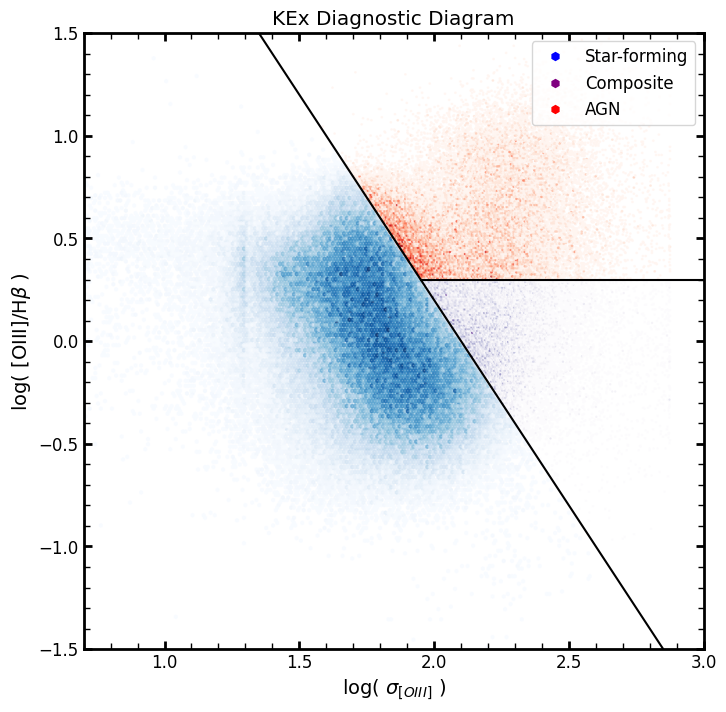

In [30]:
# Initialize the figure
norm_min, norm_max = 0.3, 300
plt.figure(figsize=(8, 8))
plt.title('KEx Diagnostic Diagram')
gridsize=250

# Plot the KEx types
plt.hexbin(log_sigma_oiii[is_kex_sf], kex_oiii_hbeta[is_kex_sf], bins=100, gridsize=gridsize, mincnt=1, cmap='Blues', alpha=0.7) # Star-forming
plt.hexbin(log_sigma_oiii[is_kex_interm], kex_oiii_hbeta[is_kex_interm], bins=100, gridsize=gridsize, mincnt=1, cmap='Purples', alpha=0.7) # Composite
plt.hexbin(log_sigma_oiii[is_kex_agn], kex_oiii_hbeta[is_kex_agn], bins=100, gridsize=gridsize, mincnt=1, cmap='Reds', alpha=0.7) # AGN

# Plot the demarcation curves
plt.plot(sigma_range, kex_upper(sigma_range), color='black')
plt.plot(sigma_range[sigma_range > 1.95], kex_lower(sigma_range[sigma_range > 1.95]), color='black')

# Legend
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='blue', markersize=8, label='Star-forming'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='purple', markersize=8, label='Composite'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='red', markersize=8, label='AGN')
]
plt.legend(handles=legend_elements, loc='best')

# Limits and Labels
plt.xlim(0.7, 3)
plt.xlabel('log( $\\sigma_{[OIII]}$ )')
plt.ylim(-1.5, 1.5)
plt.ylabel('log( [OIII]/H$\\beta$ )')

plt.show()

<a class="anchor" id="wise"></a>
#### 6) WISE Colors

WISE mid-infrared (MIR) magnitudes are a well-documented and developed diagnostic for selecting for AGN and Star-forming galaxies; red colors and bright photometry can both indicate AGN presence. Diagnostics use various combinations of the four available bands: W1 (3.4 $\mu$m), W2 (4.6 $\mu$m), W3 (12 $\mu$m), and W4 (22 $\mu$m). W4 is relatively shallow compared to the other bands so most diagnostics make use of W1, W2, W3. These generally assume that the observed MIR is tracing emission from the dusty torus, therefore may be less reliable at higher redshifts where this isn't the case.

5 Sets of WISE diagnostic flags are available for DESI-DR1 data, corresponding to:
* [Jarrett et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011ApJ...735..112J/abstract)
* [Stern et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...753...30S/abstract)
* [Mateos et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012MNRAS.426.3271M/abstract)
* [Assef et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJS..234...23A/abstract)
* [Yao et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...903...91Y/abstract)
* [Hviding et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022AJ....163..224H/abstract)

and the corresponding flags can be seen below.

In [31]:
print(ir_type)

IR_TYPE:
  - [WISE_W12,         0, "WISE W1 and W2 available (update_AGNTYPE_WISE_colors)"]
  - [WISE_W123,        1, "WISE W1, W2 and W3 available"]
  - [WISE_AGN_J11,     2, "WISE diagnostic Jarrett et al. 2011 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_J11,      3, "WISE diagnostic Jarrett et al. 2011 is not an AGN (based on W1,W2,W3)"]
  - [WISE_AGN_S12,     4, "WISE diagnostic Stern et al. 2012 is AGN (based on W1,W2)"]
  - [WISE_SF_S12,      5, "WISE diagnostic Stern et al. 2012 is not an AGN (based on W1,W2)"]
  - [WISE_AGN_M12,     6, "WISE diagnostic Mateos et al. 2012 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_M12,      7, "WISE diagnostic Mateos et al. 2012 is not an AGN (based on W1,W2,W3)"]
  - [WISE_AGN_A18,     8, "WISE diagnostic Assef et al. 2018 is AGN (based on W1,W2)"]
  - [WISE_SF_A18,      9, "WISE diagnostic Assef et al. 2018 is not an AGN (based on W1,W2)"]
  - [WISE_AGN_Y20,    10, "WISE diagnostic Yao et al. 2020 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_Y20,   

Notes on WISE photometry:
* WISE photometry in the original, DESI hosted notebook came from the [fastspecfit catalog](https://fastspecfit.readthedocs.io/en/latest/index.html) and was [hosted by DESI](https://data.desi.lbl.gov/public/). Astro Data Lab has its own hosting of the WISE photometry and the AB W1, W2, W3, W4 fluxes for survey targets at [https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.photometry](https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.photometry). This table is queriable just like the Astro Data Lab's hosting of the DESI DR1 AGN/QSO VAC was, though the AGN/QSO VAC comes with W1, W2, and W3 fluxes.
* W3 is generally less reliable than W1 and W2 due to coolant depletion after year 7 of NEOWISE.

In [32]:
# Create filters for WISE photometry
is_w1w2 = (T['ir_type'] & ir_type.WISE_W12 != 0)
is_w1w2_only = ((T['ir_type'] & ir_type.WISE_W12 != 0) & (T['ir_type'] & ir_type.WISE_W123 == 0)) # Only source without W3
is_w1w2w3 = (T['ir_type'] & ir_type.WISE_W123 != 0) # Sources with W1, W2, and W3

In [33]:
# Convert the (W1-W2) and (W2-W3) colors to AB magnitudes
mag_w1 = -2.5*np.log10(T['flux_w1']) + 22.5
mag_w2 = -2.5*np.log10(T['flux_w2']) + 22.5
mag_w3 = -2.5*np.log10(T['flux_w3']) + 22.5
color_w1w2 = mag_w1 - mag_w2
color_w2w3 = mag_w2 - mag_w3

In [34]:
# Create filters for AGN flags
is_wise_agn_any = (T['agn_maskbits'] & agn_maskbits.WISE_ANY_AGN != 0) # AGN
is_wise_sf_any = (T['ir_type'] & ir_type.WISE_SF_J11 != 0) | \
                    (T['ir_type'] & ir_type.WISE_SF_S12 != 0) | \
                        (T['ir_type'] & ir_type.WISE_SF_M12 != 0) | \
                            (T['ir_type'] & ir_type.WISE_SF_A18 != 0) | \
                                (T['ir_type'] & ir_type.WISE_SF_Y20 != 0) | \
                                    (T['ir_type'] & ir_type.WISE_SF_H22 != 0) # OR these together (" | ") to take the union of these masks

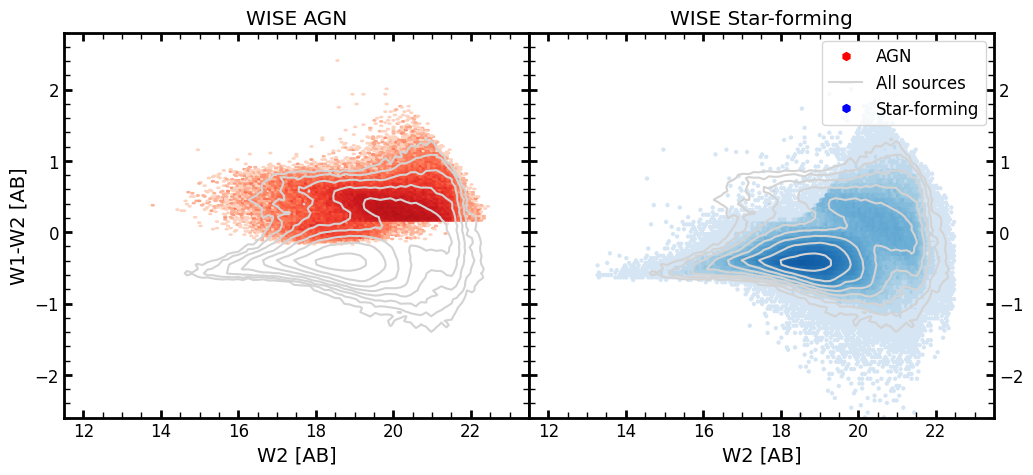

In [35]:
# Initialize the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0) # Makes the subplots touch
norm_min, norm_max = 0.3, 300

# Plot AGN on the left
ax1.hexbin(mag_w2[is_w1w2&is_wise_agn_any], color_w1w2[is_w1w2&is_wise_agn_any], bins=100, gridsize=200, mincnt=1, norm=LogNorm(norm_min, norm_max), cmap='Reds')

# Plot SF on the right
ax2.hexbin(mag_w2[is_w1w2&is_wise_sf_any], color_w1w2[is_w1w2&is_wise_sf_any], bins=100, gridsize=200, mincnt=1, norm=LogNorm(norm_min, norm_max), cmap='Blues')

# Add overall contour plots to both
dens_all,_,_ = np.histogram2d(mag_w2[is_w1w2], color_w1w2[is_w1w2], range=[[11, 24], [-3, 3]], bins=100, density=True)
dens_col_mag = dens_all.T

levels = np.power(10,np.arange(-2.3,1,0.3))

for ax in [ax1, ax2]:
    ax.set_xlabel('W2 [AB]', fontsize=14)
    ax.set_xlim(11.5,23.5)
    ax.set_ylim(-2.6,2.8)
    ax.contour(dens_col_mag, colors = 'lightgrey', extent = (11, 24, -3, 3), levels=levels)

ax2.tick_params(labelleft=False, labelright=True)
ax1.set_ylabel('W1-W2 [AB]', fontsize=14)

legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='red', markersize=8, label='AGN'),
    Line2D([0], [0], marker='_', color='lightgray', markersize=8, label='All sources'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='blue', markersize=8, label='Star-forming')
]
plt.legend(handles=legend_elements, loc='best')

ax1.set_title('WISE AGN')
ax2.set_title('WISE Star-forming')

plt.show()

Now we will do individual diagnostics, like Assef+18 or Jarrett+11. These, unlike the example above, are mutually exclusive so an Assef+18 AGN can't also be an Assef+18 SF and vice versa.

In [36]:
# Assef+18 filters
is_a18_agn = (T['ir_type'] & ir_type.WISE_AGN_A18 != 0) # Assef+18 AGN
is_a18_sf = (T['ir_type'] & ir_type.WISE_SF_A18 != 0) # Assef+18 SF

In [37]:
# Assef+18 AGN selection reliability curve from that work
def assef18_reliability(reliability=90):
    # 90% reliability
    alpha_90 = 0.65
    beta_90 = 0.153
    gamma_90 = 13.86        
                    
    # 75% reliability
    alpha_75 = 0.486
    beta_75 = 0.092
    gamma_75 = 13.07 
     
    # Choose here (default 90%):
    alpha = alpha_90
    beta = beta_90
    gamma = gamma_90
    if reliability==75:
        alpha = alpha_75
        beta = beta_75
        gamma = gamma_75
     
    # Dummy values for W2 in Vega mags
    xx = np.arange(8, 20, 0.1)
    
    # Offsets from Vega to AB magnitudes (Jarrett+2011) 
    W1_vega2ab = 2.699
    W2_vega2ab = 3.339
    W3_vega2ab = 5.174

    # Assef+2018 diagnostic
    is_bright_a18 = xx<=gamma
    yy = alpha* np.exp(beta*(xx-gamma)**2)
    yy[is_bright_a18] = alpha
    
    # Return in AB mags for DESI
    return(xx+W2_vega2ab, yy+(W1_vega2ab-W2_vega2ab))

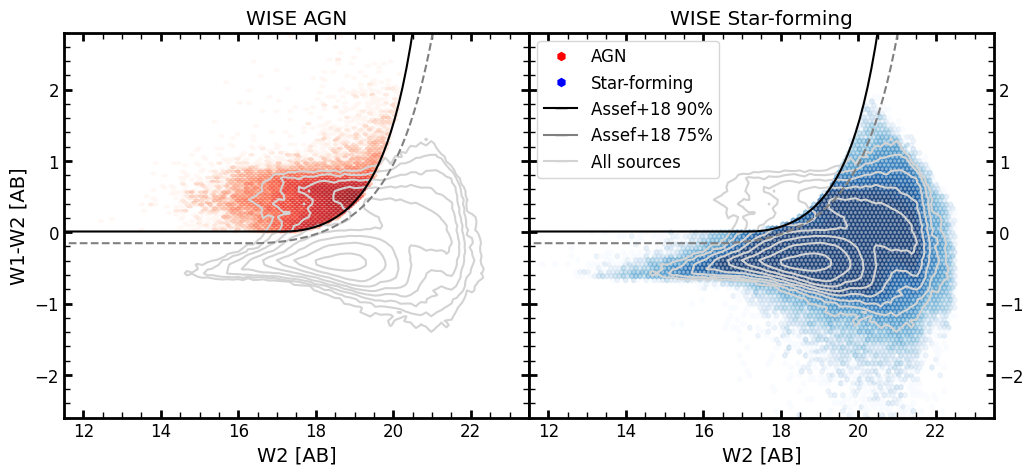

In [38]:
# Initialize the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0) # Makes the subplots touch
norm_min, norm_max = 1, 300

# Plot A18 AGN on the left
ax1.hexbin(mag_w2[is_a18_agn&is_w1w2], color_w1w2[is_a18_agn&is_w1w2], mincnt=1, gridsize=100, norm=LogNorm(norm_min, norm_max), alpha=0.5, label='AGN', cmap='Reds')

# Plot A18 SF on the right
ax2.hexbin(mag_w2[is_a18_sf&is_w1w2], color_w1w2[is_a18_sf&is_w1w2], mincnt=1, gridsize=100, norm=LogNorm(norm_min, norm_max), alpha=0.5, label='Star-forming', cmap='Blues')

# Add overall contour plots to both
dens_all,_,_ = np.histogram2d(mag_w2[is_w1w2], color_w1w2[is_w1w2], range=[[11, 24], [-3, 3]], bins=100, density=True)
dens_col_mag = dens_all.T

levels = np.power(10,np.arange(-2.3,1,0.3))

for ax in [ax1, ax2]:
    ax.set_xlabel('W2 [AB]', fontsize=14)
    ax.set_xlim(11.5,23.5)
    ax.set_ylim(-2.6,2.8)
    ax.contour(dens_col_mag, colors = 'lightgrey', extent = (11, 24, -3, 3), levels=levels)

ax2.tick_params(labelleft=False, labelright=True)
ax1.set_ylabel('W1-W2 [AB]', fontsize=14)

# Add reliability curves to both
x_reliability_90, y_reliability_90 = assef18_reliability(reliability=90)
x_reliability_75, y_reliability_75 = assef18_reliability(reliability=75)
ax1.plot(x_reliability_90, y_reliability_90, color='black')
ax1.plot(x_reliability_75, y_reliability_75, ls='--', color='gray')
ax2.plot(x_reliability_90, y_reliability_90, color='black')
ax2.plot(x_reliability_75, y_reliability_75, ls='--', color='gray')

legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='red', markersize=8, label='AGN'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='blue', markersize=8, label='Star-forming'),
    Line2D([0], [0], marker='_', color='black', markersize=8, label='Assef+18 90%'),
    Line2D([0], [0], marker='_', color='gray', markersize=8, label='Assef+18 75%'),
    Line2D([0], [0], marker='_', color='lightgray', markersize=8, label='All sources')
]
plt.legend(handles=legend_elements, loc='best')

ax1.set_title('WISE AGN')
ax2.set_title('WISE Star-forming')

plt.show()